In [361]:
import json
from pprint import pprint
import pandas as pd

In [394]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [470]:
# load json data
with open('mlb_top_100.json') as json_data:
    data = json.load(json_data)

In [471]:
# how many records are there?
len(data)

99

In [472]:
# look at the dictionary keys in one record
data[0].keys()

dict_keys(['bats', 'player_last_name', 'birthdate', 'drafted', 'positions', 'weight', 'content', 'year', 'eta', 'preseason20', 'thrw', 'player_id', 'player_first_name', 'height', 'signed', 'school', 'twitter', 'team_file_code', 'preseason100'])

In [473]:
# inspect one record
pprint(data[67])

{'bats': '',
 'birthdate': '',
 'content': {'default': '<b>Scouting grades</b>: Hit: 60 | Power: 65 | Run: 70 '
                        '| Arm: 60 | Field: 60 | Overall: 70\n'
                        "<p>Acuna's grandfather, a pitcher, and father, a "
                        'fellow outfielder, played pro ball but never reached '
                        'the big leagues. After a 2017 season that saw him '
                        'play, and dominate, across three levels up to '
                        "Triple-A, there's little question the 20-year-old "
                        'phenom will easily surpass the two previous '
                        'generations in his family. He capped his remarkable '
                        'year off by winning MVP honors in the Arizona Fall '
                        'League.\n'
                        "<p>It's hard to find a flaw in Acuna's game. He has a "
                        'buggy whip of a swing and ultra-fast hands that allow '
               

In [474]:
# iterate over data and clean up the content
for line in data:
    line['content'] = line['content']['default'].replace('\n', '').strip().split('<p>')

In [475]:
# pull scouting grades into new key/value
for line in data:
    line['bio'] = []
    for item in line['content']:
        if 'scouting grades' in item.lower():
            line['scouting_grades'] = item
        else:
            line['bio'].append(item)
    
    # delete the old information
    del line['content']
    
    # clean up the new bio
    line['bio'] = ''.join(line['bio'])

In [476]:
# inspect one record
pprint(data[67])

{'bats': '',
 'bio': "Acuna's grandfather, a pitcher, and father, a fellow outfielder, "
        'played pro ball but never reached the big leagues. After a 2017 '
        'season that saw him play, and dominate, across three levels up to '
        "Triple-A, there's little question the 20-year-old phenom will easily "
        'surpass the two previous generations in his family. He capped his '
        'remarkable year off by winning MVP honors in the Arizona Fall '
        "League.It's hard to find a flaw in Acuna's game. He has a buggy whip "
        'of a swing and ultra-fast hands that allow him to make hard contact '
        'to all fields. His power started showing up, and then some, in 2017, '
        'and seeing his 21 homers be a low mark in his career does not sound '
        'outlandish. While he did strike out a bit, his K rate did go down '
        "each time he moved up the Braves' ladder, with an advanced approach "
        'especially given his age. He can flat-out fly,

In [477]:
# clean up scouting grades
for line in data:
    if line['scouting_grades'].lower().startswith('<b>scouting grades:</b>'):
        line['scouting_grades'] = line['scouting_grades'].lower().replace('<b>scouting grades:</b>', '').strip().split('|')
    
    elif line['scouting_grades'].lower().startswith('<b>scouting grades</b>:'):
        line['scouting_grades'] = line['scouting_grades'].lower().replace('<b>scouting grades</b>:', '').strip().split('|')
    
    else:
        line['scouting_grades'] = []

In [478]:
# extracting metrics from grades
for line in data:
    for item in line['scouting_grades']:
        metric = item.strip().split(':')
        line[metric[0].strip()] = metric[1].strip()

In [479]:
data[0]

{'bats': '',
 'bio': "The son of a former NBA player, Manning was a two-sport star who could have gone on to play both sports at Loyola-Marymount, and when the Tigers went slightly above pick value to sign him away from that commitment, they knew Manning might be a bit of a project. The Tigers have proceeded with understandable caution, holding the 6-foot-6 right-hander back in extended Spring Training to start his first full year of pro ball. He eventually pitched his way from short-season Connecticut to full-season West Michigan, capping his season off with a 10-strikeout performance in the Midwest League playoffs.Manning has as much, if not more, upside than any pitcher in the Tigers system, but he also might have the farthest to go to reach it. As he works to refine his delivery, his command and velocity has fluctuated. When he's in sync, he's easily in the low-90s with the ability to touch 95-96 mph with ease. It's easy to dream on more consistent velocity as he figures things out

In [480]:
# convert strings to integers where possible
for line in data:
    for key in line:
        try:
            line[key] = int(line[key])
        except:
            pass

In [481]:
# load data into a DataFrame
df = pd.DataFrame(data)

In [482]:
# inspect the data types
df.dtypes

arm                  float64
bats                  object
bio                   object
birthdate             object
changeup             float64
control              float64
curve                float64
curveball            float64
cutter               float64
drafted               object
eta                    int64
fastball             float64
field                float64
height                object
hit                  float64
overall              float64
player_first_name     object
player_id              int64
player_last_name      object
positions             object
power                float64
preseason100          object
preseason20           object
run                  float64
school                object
scouting_grades       object
screwball            float64
signed                object
slider               float64
team_file_code        object
thrw                  object
twitter               object
weight                object
year                  object
dtype: object

In [483]:
# inspect the DataFrame
df.head()

,arm,bats,bio,birthdate,changeup,control,curve,curveball,cutter,drafted,...,school,scouting_grades,screwball,signed,slider,team_file_code,thrw,twitter,weight,year
0,NaN,,"The son of a former NBA player, Manning was a ...",,50.0,50.0,NaN,60.0,NaN,"2016, 1st (9) - DET",...,,"[fastball: 65 , curveball: 60 , changeup: 50...",NaN,,NaN,DET,,MattManning19,,
1,50.0,,"Haseley was a two-way standout at Virginia, pl...",,NaN,NaN,NaN,NaN,NaN,"2017, 1st (8) - PHI",...,,"[hit: 55 , power: 45 , run: 55 , arm: 50 , ...",NaN,,NaN,PHI,,adamhaseley7,,
2,70.0,,"Signed for $225,000 out of the Dominican Repub...",,NaN,NaN,NaN,NaN,NaN,,...,,"[hit: 60 , power: 55 , run: 75 , arm: 70 , ...",NaN,"July 2, 2013 - WSH",NaN,WAS,,,,
3,50.0,,The top-rated international prospect during th...,,NaN,NaN,NaN,NaN,NaN,,...,,"[hit: 60 , power: 70 , run: 40 , arm: 50 , ...",NaN,"Aug. 1, 2013 - CHC",NaN,CWS,,Lamantha21,,
4,NaN,,"Gonsalves was an intriguing, albeit a bit inco...",,60.0,55.0,NaN,50.0,NaN,"2013, 4th (110) - MIN",...,,"[fastball: 55 , curveball: 50 , slider: 40 ,...",NaN,,40.0,MIN,,TheSGonsalves,,


[]

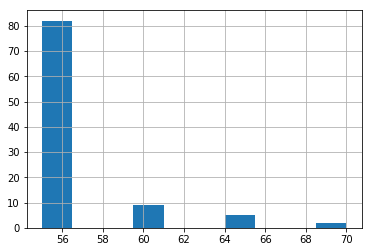

In [486]:
# calculate the average overall score
df['overall'].hist().plot()